okay: 3
[x_center, y_center, r]: [ 1687.5    79.1  1119.7]
residual: -0.0455579105765


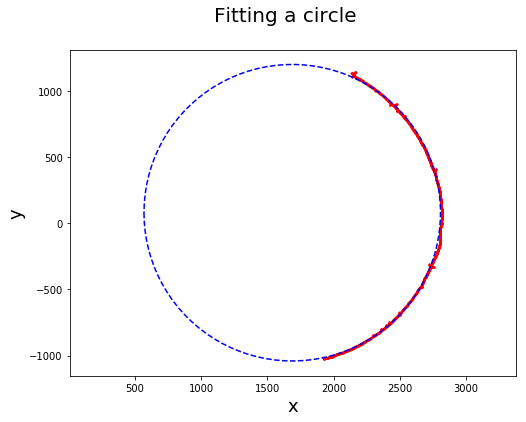

In [10]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#if using jupyter so gui doesn't crash...
%matplotlib inline

# define function to minimize
# (x-x_c)^2 + (y-y_c)^2 = r^2   --->   (x-x_c)^2 + (y-y_c)^2 - r^2 = errFunc(P,X)  ~= 0  ---> minimize errFunc
# P = [x_center, y_center, radius]
# X = [x,y]
def errFuncCircle(P, X):
    return (X[:,0] - P[0])**2 + (X[:,1] - P[1])**2 - P[2]**2

# generate some random noisy data or supply your own
# x,y 2 vectors of equal length giving x,y cartesian coords roughly lying on circle
nPts = 100
x_center_true = 1200
y_center_true = 3000
r_true = 2500
arcRange = [-np.pi/4, 1*np.pi/3]

t = np.linspace(arcRange[0],arcRange[1], nPts)
tNoise = np.random.random(nPts)/100.
rNoise = np.random.random(nPts)/50. + .99

#x = r_true*rNoise*+np.cos(t+tNoise) + x_center_true
#y = r_true*rNoise*np.sin(t+tNoise) + y_center_true
# /data generation

#x,y are possibly separate vectors, assemble as 1 vector (v) because I like to keep it generalized
#v = np.zeros([len(x),2])
#v[:,0] = x
#v[:,1] = y

#or #load x,y coords from text/csv file
fileName = './data/circle_pts.csv'
v = np.loadtxt(fileName, comments='$', delimiter=',', skiprows=1)

#also possible #save coords in loadable format
#np.savetxt(fileName, v, fmt='%.3f', delimiter=',', header='x,y', comments='')

#do minimization/fitting
pInit = [0, 0, 1]  #initial guess at fitting parameters. usually not super important if data well-behaved
p, okay = optimize.leastsq(errFuncCircle, pInit, args=(v))  # p = [x_center, y_center, radius]   |   okay=1 when all good
totResidual = np.sum( errFuncCircle(p,v) )  #residual should be small.  Could also calculate like R^2. This is not normalized

#print results
np.set_printoptions(precision=1, suppress=True)  # printout formatting
print('okay:', okay)
print('[x_center, y_center, r]:', p)
print('residual:', totResidual)

#visiualize
t = np.linspace(-np.pi,np.pi,100)
fig = plt.figure(figsize=(8.0, 6.0))
fig.suptitle('Fitting a circle', fontsize=20)
ax = fig.add_subplot(111)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.plot(v[:,0], v[:,1], "r.",markersize=2)
ax.plot(p[2]*np.cos(t) + p[0], p[2]*np.sin(t) + p[1], "b--" )
ax.set_aspect('equal', 'datalim')

fig.savefig('./output/fit_circle.png', bbox_inches='tight', dpi=fig.dpi)
plt.show()

okay: 1
[x_center, y_center, a, b] fit : [ 1591.2    80.4  1218.9  1149. ]
residual: -1.73002481461e-05


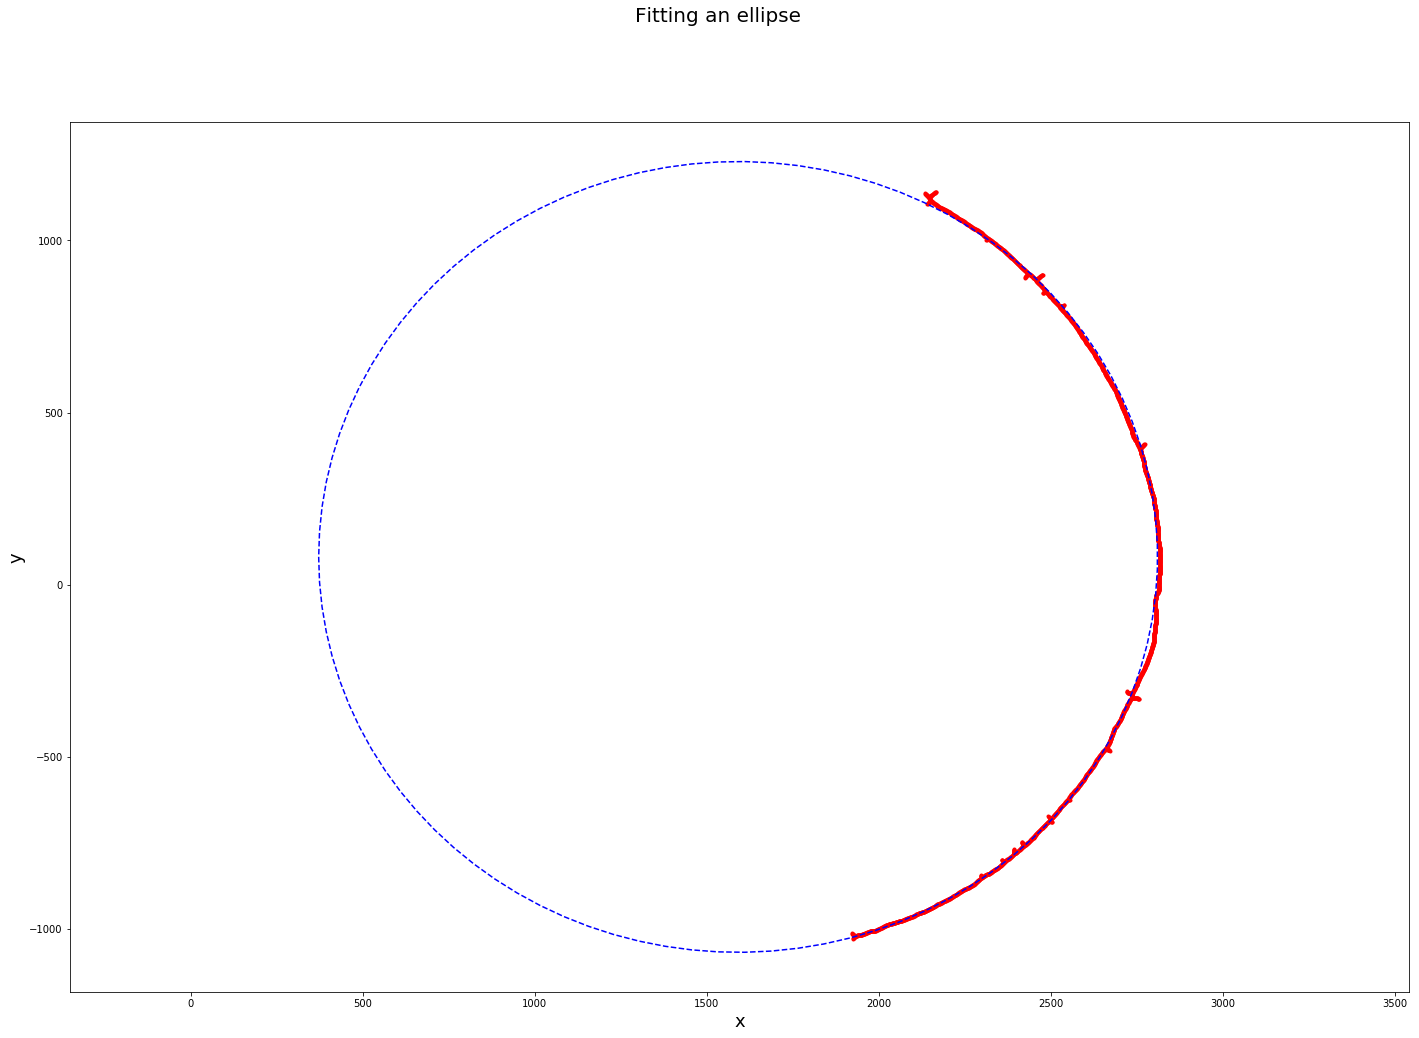

In [5]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#if using jupyter so gui doesn't crash...
%matplotlib inline

# define function to minimize
# (x-x_c)^2/a^2 + (y-y_c)^2/b^2 = 1   --->   (x-x_c)^2/a^2 + (y-y_c)^2/b^2 - 1 ---> (x-x_c)^2 + c*(y-y_c)^2 - a^2  {c = a^2/b^2}
# P = [x_center, y_center, a, a^2/b^2]
# X = [x,y]
# use this alternate parameter definition to keep problem well-posed,
#    otherwise <large_number> / <large_number> = gives problems with machine precision and increases error
#    one could also try and rescale the centers/radii to be closer to 1 (i.e. divide all values by 1000 before fit then redcale after)
#    to increase stability of fit (less likely to not converge) + reduce error
def errFuncEllipse(P, X):
    return (X[:,0] - P[0])**2 + P[3]*(X[:,1] - P[1])**2 - P[2]**2



# #also here's a parametric definition to generate ellipse points ( [x,y] ) without noise
#def ellipsePtsParametric(P,T):
#    return [P[0]+P[2]*np.cos(t), P[1]+P[3]*np.cos(t)]

# generate some random noisy data or supply your own
# x,y 2 vectors of equal length giving x,y cartesian coords roughly lying on circle
#nPts = 100
#x_center_true = 1200
#y_center_true = 3000
#a_true = 2500
#b_true = 1000
#x_center_true = 1.2
#y_center_true = 3
#a_true = 2.5
#b_true = 1
#arcRange = [-np.pi/4, 1*np.pi/3] #use input in an arc
#fullRange = [-np.pi, np.pi] #use input or plot output for whole circle (/ellipse)

#t = np.linspace(arcRange[0],arcRange[1], nPts)
#tNoise = 0 #np.random.random(nPts)/100 - 0.005
#rNoise = np.random.random(nPts)/50. + .99

#x = a_true*rNoise*+np.cos(t+tNoise) + x_center_true
#y = b_true*rNoise*np.sin(t+tNoise) + y_center_true
# /data generation


#x,y possible separate vectors, assemble as 1 vector (v) because I like to keep it generalized
#v = np.zeros([len(x),2])
#v[:,0] = x
#v[:,1] = y

#or #load x,y coords from text/csv file
fileName = './data/circle_pts.csv'
v = np.loadtxt(fileName, comments='', delimiter=',', skiprows=1)

#also possible #save coords in loadable format
#np.savetxt(fileName, v, fmt='%.3f', delimiter=',', header='x,y', comments='')

#do minimization/fitting
pInit = [1000, 1000, 1000, 1]  #initial guess at fitting parameters. usually not super important if data well-behaved
p, okay = optimize.leastsq(errFuncEllipse, pInit, args=(v))  # p = [x_center, y_center, radius]   |   okay=1 when all good
totResidual = np.sum( errFuncEllipse(p,v) )  #residual should be small.  Could also calculate like R^2. This is not normalized

realP = np.copy(p)
realP[2] = np.abs(p[2])
realP[3] = np.sqrt(p[2]**2/np.abs(p[3]))

#print results
np.set_printoptions(precision=1, suppress=True)  # printout formatting
print('okay:', okay)
#print('[x_center, y_center, a, b] true:', [x_center_true, y_center_true, a_true, b_true])
print('[x_center, y_center, a, b] fit :', realP)
print('residual:', totResidual)

#visiualize
tFull = np.linspace(-np.pi,np.pi,nPts)
fig = plt.figure(figsize=(24.0, 16.0))
fig.suptitle('Fitting an ellipse', fontsize=20)
ax = fig.add_subplot(111)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.plot(v[:,0], v[:,1], "r.")
ax.plot(realP[2]*np.cos(tFull) + p[0], realP[3]*np.sin(tFull) + p[1], "b--" )
ax.set_aspect('equal', 'datalim')

fig.savefig('./output/fit_ellipse.png', bbox_inches='tight', dpi=fig.dpi)
plt.show()

okay: 3
[a, b, c] a*theta^2 + b*theta + c: [-2183.6   210.8  2805.4]
residual: 1.58706825459e-10


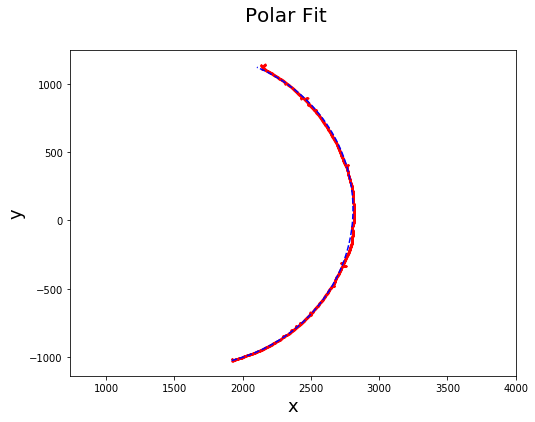

In [9]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#if using jupyter so gui doesn't crash...
#%matplotlib qt4

# define function to minimize
# (x-x_c)^2 + (y-y_c)^2 = r^2   --->   (x-x_c)^2 + (y-y_c)^2 - r^2 = errFunc(P,X)  ~= 0  ---> minimize errFunc
# P = [p^0, p^1, p^2]
# theta = [theta]
def fitFuncPolar(P, theta):
    return P[0]*theta**2 + P[1]*theta + P[2]

def errFuncPolar(P, theta, r):
    return r - fitFuncPolar(P,theta)

# generate some random noisy data or spply your own
# x,y 2 vectors of equal length giving x,y cartesian coords roughly lying on circle
#nPts = 100
#x_center_true = 1200
#y_center_true = 3000
#r_true = 2500
#arcRange = [-np.pi/4, 1*np.pi/3]

#t = np.linspace(arcRange[0],arcRange[1], nPts)
#tNoise = np.random.random(nPts)/100.
#rNoise = np.random.random(nPts)/50. + .99

#x = r_true*rNoise*+np.cos(t+tNoise) + x_center_true
#y = r_true*rNoise*np.sin(t+tNoise) + y_center_true
# /data generation

#x,y possible separate vectors, assemble as 1 vector (v) because I like to keep it generalized
#v = np.zeros([len(x),2])
#v[:,0] = x
#v[:,1] = y

#or #load x,y coords from text/csv file
fileName = './data/circle_pts.csv'
v = np.loadtxt(fileName, comments='$', delimiter=',', skiprows=1)
theta = np.arctan(v[:,1]/v[:,0])
r = np.sqrt(v[:,0]**2 + v[:,1]**2)

#also possible #save coords in loadable format
#np.savetxt(fileName, v, fmt='%.3f', delimiter=',', header='x,y', comments='')

#do minimization/fitting
pInit = [0, 0, 0]  #initial guess at fitting parameters. usually not super important if data well-behaved
p, okay = optimize.leastsq(errFuncPolar, pInit, args=(theta,r))  # p = [x_center, y_center, radius]   |   okay=1 when all good
totResidual = np.sum( errFuncPolar(p,theta,r) )  #residual should be small.  Could also calculate like R^2. This is not normalized

#print results
np.set_printoptions(precision=1, suppress=True)  # printout formatting
print('okay:', okay)
print('[a, b, c] a*theta^2 + b*theta + c:', p)
print('residual:', totResidual)

#visiualize
thetaMin = np.min(theta)
thetaMax = np.max(theta)

t = np.linspace(thetaMin,thetaMax,100)
fig = plt.figure(figsize=(8.0, 6.0))
fig.suptitle('Polar Fit', fontsize=20)
ax = fig.add_subplot(111)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.plot(v[:,0], v[:,1], "r.",markersize=2)

r = fitFuncPolar(p,t)
xfit = r * np.cos(t)
yfit = r * np.sin(t)

ax.plot(xfit, yfit, "b--" )
ax.set_aspect('equal', 'datalim')

fig.savefig('./output/fit_polar.png', bbox_inches='tight', dpi=fig.dpi)
plt.show()

In [21]:
p[1] + 2*p[2] * t*t

array([ 1561. ,  1507.1,  1454.2,  1402.5,  1351.8,  1302.3,  1253.8,
        1206.5,  1160.2,  1115. ,  1071. ,  1028. ,   986.2,   945.4,
         905.8,   867.2,   829.8,   793.4,   758.2,   724. ,   691. ,
         659. ,   628.2,   598.4,   569.8,   542.2,   515.7,   490.4,
         466.1,   443. ,   420.9,   400. ,   380.1,   361.4,   343.7,
         327.2,   311.7,   297.4,   284.1,   272. ,   260.9,   251. ,
         242.1,   234.4,   227.7,   222.2,   217.7,   214.4,   212.1,
         211. ,   210.9,   212. ,   214.1,   217.4,   221.7,   227.2,
         233.7,   241.4,   250.1,   260. ,   270.9,   283. ,   296.1,
         310.4,   325.7,   342.2,   359.7,   378.4,   398.1,   419. ,
         440.9,   464. ,   488.1,   513.4,   539.7,   567.2,   595.7,
         625.4,   656.1,   688. ,   720.9,   755. ,   790.2,   826.4,
         863.8,   902.2,   941.8,   982.4,  1024.2,  1067. ,  1111. ,
        1156. ,  1202.2,  1249.4,  1297.8,  1347.2,  1397.8,  1449.4,
        1502.2,  155

In [10]:
r

array([ 1292.9,  1350.1,  1406.2,  1461.2,  1515.1,  1568. ,  1619.7,
        1670.3,  1719.8,  1768.2,  1815.6,  1861.8,  1906.9,  1950.9,
        1993.9,  2035.7,  2076.4,  2116. ,  2154.6,  2192. ,  2228.3,
        2263.5,  2297.7,  2330.7,  2362.6,  2393.5,  2423.2,  2451.8,
        2479.4,  2505.8,  2531.1,  2555.4,  2578.5,  2600.5,  2621.5,
        2641.3,  2660. ,  2677.7,  2694.2,  2709.6,  2724. ,  2737.2,
        2749.4,  2760.4,  2770.3,  2779.2,  2786.9,  2793.6,  2799.1,
        2803.6,  2806.9,  2809.2,  2810.3,  2810.3,  2809.3,  2807.1,
        2803.9,  2799.5,  2794.1,  2787.5,  2779.9,  2771.1,  2761.3,
        2750.3,  2738.3,  2725.1,  2710.9,  2695.6,  2679.1,  2661.6,
        2642.9,  2623.2,  2602.3,  2580.4,  2557.4,  2533.2,  2508. ,
        2481.6,  2454.2,  2425.7,  2396. ,  2365.3,  2333.4,  2300.5,
        2266.5,  2231.3,  2195.1,  2157.8,  2119.3,  2079.8,  2039.2,
        1997.4,  1954.6,  1910.7,  1865.6,  1819.5,  1772.3,  1724. ,
        1674.5,  162

In [62]:
R = fitFuncPolar(p,t)
rr = (R[0:-1] + R[1:])/2.
rP = R[1:] - R[0:-1]

rrr = (rr[0:-1] + rr[1:])/2. 
rrP = (rP[0:-1] + rP[1:])/2.
rPP = rP[1:] - rP[0:-1]

In [63]:
curvatureN = (rrr**2. + rrP**2.)**(3./2.)
curvatureD = rrr**2.0 + 2.0*rrP**2. - rrr * rPP

In [64]:
curvatureN/curvatureD

array([ 2198.9,  2221.6,  2243.8,  2265.6,  2287. ,  2307.9,  2328.5,
        2348.6,  2368.2,  2387.5,  2406.3,  2424.6,  2442.6,  2460.1,
        2477.2,  2493.9,  2510.1,  2525.9,  2541.3,  2556.3,  2570.8,
        2584.9,  2598.6,  2611.8,  2624.6,  2637. ,  2648.9,  2660.5,
        2671.6,  2682.2,  2692.5,  2702.3,  2711.7,  2720.6,  2729.2,
        2737.3,  2745. ,  2752.2,  2759. ,  2765.4,  2771.4,  2776.9,
        2782. ,  2786.7,  2790.9,  2794.7,  2798.1,  2801.1,  2803.6,
        2805.7,  2807.4,  2808.7,  2809.5,  2809.9,  2809.9,  2809.4,
        2808.5,  2807.2,  2805.4,  2803.3,  2800.7,  2797.6,  2794.2,
        2790.3,  2786. ,  2781.2,  2776. ,  2770.4,  2764.4,  2758. ,
        2751.1,  2743.8,  2736. ,  2727.9,  2719.3,  2710.2,  2700.8,
        2690.9,  2680.6,  2669.8,  2658.7,  2647.1,  2635.1,  2622.6,
        2609.7,  2596.4,  2582.7,  2568.5,  2553.9,  2538.9,  2523.5,
        2507.6,  2491.3,  2474.5,  2457.4,  2439.8,  2421.8,  2403.3])

In [55]:
def rV(p,t):
    return p[2] + p[1]*t + p[0]*(t**2)

def rPrime(p,t):
    return p[1] + 2*p[0]*t
    
def rDoublePrime(p,t):
    return 2*p[0]
    
def rCurvatureNum(p,t):
    return np.abs(np.power(rV(p,t),2.) + 2.*np.power(rPrime(p,t),2.) - rV(p,t) * rDoublePrime(p,t) )

def rCurvatureDen(p,t):
     return np.power(np.power(rV(p,t), 2.) + np.power(rPrime(p,t), 2.), 3./2.)

def radiusCurvature(p,t):
    return rCurvatureDen(p,t) / rCurvatureNum(p,t)
        
theta = np.linspace(thetaMin,thetaMax,100)

h = rCurvature1(pp,theta)
w = rCurvature2(pp,theta)
z = radiusCurvature(p,t)

#print(h)
#print(w)
#print(w/h)
#print(z)

print(np.min(z))


1100.47103166
